# Business Problem: One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data. The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\rmadh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [3]:
%cd "C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\1. Predicting Credit Card Spend & Identifying Key Drivers"

C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\1. Predicting Credit Card Spend & Identifying Key Drivers


In [4]:
data=pd.read_excel("Data Set.xlsx")


In [5]:
#pandas_profiling.ProfileReport(data)

In [6]:
data_num=data.select_dtypes(include=["float64"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [8]:
def clipping(x):
    x = x.dropna().clip(upper=x.quantile(0.99))
    x = x.dropna().clip(lower=x.quantile(0.01))
    return x

     

In [9]:
data_num=data_num.apply(lambda x : clipping(x))

In [10]:
def missing_values(x):
    x = x.fillna(mean(x))
    return x


In [11]:
data_num=data_num.apply(lambda x : missing_values(x))

In [12]:
data_num_col=data_num.columns

In [13]:
data_cat=data.select_dtypes(include=["int64","object"]).drop(["custid","age","ed","employ","income","spoused","address","cardtenure","card2tenure","hourstv","tenure"],axis=1)
data_cat_col=data_cat.columns

NameError: name 'train_obj' is not defined

In [15]:
data_cat

,region,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,2,September,3,1,1,1,0,2,...,0,0,0,1,1,0,0,0,1,0
1,5,0,2,May,4,2,0,1,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,1,6,June,2,2,0,5,0,2,...,1,0,0,0,0,0,1,0,0,0
3,4,0,2,May,3,2,0,1,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,0,3,July,3,2,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,6,January,1,1,0,5,0,5,...,1,0,0,0,0,0,1,0,0,0
4996,3,0,5,May,2,1,0,3,0,4,...,1,0,0,0,0,0,0,0,0,0
4997,4,0,6,August,4,1,0,5,0,4,...,1,1,0,0,0,0,1,0,0,0
4998,1,0,4,December,4,2,0,2,0,5,...,1,0,1,1,1,0,1,0,0,0


In [16]:
for c_feature in data_cat_col:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [17]:
#pandas_profiling.ProfileReport(data_cat)

In [18]:
data.drop(data_cat_col,axis=1,inplace=True)

In [19]:
data_new=pd.concat([data,data_cat],axis=1)

In [20]:
data_new["total_spend"]=data_new["cardspent"]+data_new["card2spent"]


In [21]:
data_new["ln_total_spend"]=np.log(data_new["total_spend"]+1)

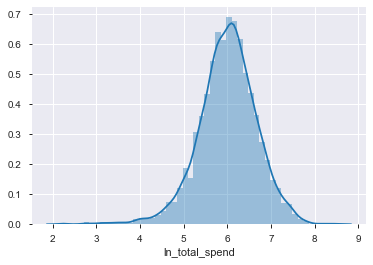

In [22]:

sns.distplot(data_new.ln_total_spend)

In [23]:
data_new.drop(["custid"],axis=1,inplace=True)

In [24]:
feature_columns=data_new.columns.difference(["ln_total_spend","custid"])

In [25]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
regressor = DecisionTreeRegressor(random_state = 0)

In [27]:
data_new.drop(data_num.columns,axis=1,inplace=True)

In [28]:
data_new=pd.concat([data_new,data_num],axis=1)

In [29]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( data_new[feature_columns],
                                                  data_new['ln_total_spend'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [30]:
regressor.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [31]:
y_pred = regressor.predict(test_X)

In [32]:
y_pred

array([5.78999835, 6.24627144, 6.33269327, ..., 5.38183097, 5.87338455,
       5.79701979])

In [33]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': regressor.predict( train_X ) } )

In [34]:
tree_train_pred

,actual,predicted
4036,6.505993,6.505993
2883,5.208557,5.208557
4162,5.396079,5.395958
4640,6.216626,6.216626
2430,7.703924,7.703924
...,...,...
1593,5.338451,5.338667
4060,5.181840,5.181259
1346,6.343652,6.343353
3454,5.716863,5.716600


In [35]:
mean_squared_error(tree_train_pred.actual,tree_train_pred.predicted)

3.088552507731291e-08

In [36]:
r2_score(tree_train_pred.actual,tree_train_pred.predicted)

0.9999999333558176

In [37]:
param_grid = {'max_depth': np.arange(3, 50),
             'max_features': np.arange(3,50)}

In [38]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(train_X, train_y)

In [39]:
tree.best_params_

NameError: name 'tree' is not defined

In [ ]:
tree.best_score_

In [ ]:
DecisionTreeRegressor?


In [40]:
all_columns = "+".join(train_X.columns.difference( ['ln_total_spend','total_spend',"cust_id"] ))

print (all_columns)

active_1+address+addresscat_2+addresscat_3+addresscat_4+addresscat_5+age+agecat_3+agecat_4+agecat_5+agecat_6+bfast_2+bfast_3+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard_1+callid_1+callwait_1+carbought_0+carbought_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+card2spent+card2tenure+card2tenurecat_2+card2tenurecat_3+card2tenurecat_4+card2tenurecat_5+card2type_2+card2type_3+card2type_4+card_2+card_3+card_4+card_5+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardmon+cardspent+cardten+cardtenure+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+cars_1+cars_2+cars_3+cars_4+cars_5+cars_6+cars_7+cars_8+cartype_0+cartype_1+carvalue+churn_1+commute_10+commute_2+commute

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [42]:
y, X = dmatrices('ln_total_spend~active_1+address+addresscat_2+addresscat_3+addresscat_4+addresscat_5+age+agecat_3+agecat_4+agecat_5+agecat_6+bfast_2+bfast_3+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard_1+callid_1+callwait_1+carbought_0+carbought_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+card2spent+card2tenure+card2tenurecat_2+card2tenurecat_3+card2tenurecat_4+card2tenurecat_5+card2type_2+card2type_3+card2type_4+card_2+card_3+card_4+card_5+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardmon+cardspent+cardten+cardtenure+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+cars_1+cars_2+cars_3+cars_4+cars_5+cars_6+cars_7+cars_8+cartype_0+cartype_1+carvalue+churn_1+commute_10+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commutebike_1+commutebus_1+commutecar_1+commutecarpool_1+commutecat_2+commutecat_3+commutecat_4+commutecat_5+commutemotorcycle_1+commutenonmotor_1+commutepublic_1+commuterail_1+commutetime+commutewalk_1+confer_1+creddebt+debtinc+default_1+ebill_1+ed+edcat_2+edcat_3+edcat_4+edcat_5+empcat_2+empcat_3+empcat_4+empcat_5+employ+equip_1+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hometype_3+hometype_4+hourstv+inccat_2+inccat_3+inccat_4+inccat_5+income+internet_1+internet_2+internet_3+internet_4+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+jobsat_2+jobsat_3+jobsat_4+jobsat_5+lncardmon+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+marital_1+multline_1+news_1+othdebt+owncd_1+owndvd_1+ownfax_1+owngame_1+ownipod_1+ownpc_1+ownpda_1+owntv_1+ownvcr_1+pager_1+pets_1+pets_10+pets_11+pets_12+pets_13+pets_14+pets_15+pets_16+pets_18+pets_19+pets_2+pets_21+pets_3+pets_4+pets_5+pets_6+pets_7+pets_8+pets_9+pets_birds_1+pets_birds_2+pets_birds_3+pets_birds_4+pets_birds_5+pets_cats_1+pets_cats_2+pets_cats_3+pets_cats_4+pets_cats_5+pets_cats_6+pets_dogs_1+pets_dogs_2+pets_dogs_3+pets_dogs_4+pets_dogs_5+pets_dogs_7+pets_freshfish_1+pets_freshfish_10+pets_freshfish_11+pets_freshfish_12+pets_freshfish_13+pets_freshfish_14+pets_freshfish_15+pets_freshfish_16+pets_freshfish_2+pets_freshfish_3+pets_freshfish_4+pets_freshfish_5+pets_freshfish_6+pets_freshfish_7+pets_freshfish_8+pets_freshfish_9+pets_reptiles_1+pets_reptiles_2+pets_reptiles_3+pets_reptiles_4+pets_reptiles_5+pets_reptiles_6+pets_saltfish_1+pets_saltfish_2+pets_saltfish_3+pets_saltfish_4+pets_saltfish_5+pets_saltfish_6+pets_saltfish_7+pets_saltfish_8+pets_small_1+pets_small_2+pets_small_3+pets_small_4+pets_small_5+pets_small_6+pets_small_7+polcontrib_1+polparty_1+polview_2+polview_3+polview_4+polview_5+polview_6+polview_7+reason_2+reason_3+reason_4+reason_9+region_2+region_3+region_4+region_5+reside_2+reside_3+reside_4+reside_5+reside_6+reside_7+reside_8+reside_9+response_01_1+response_02_1+response_03_1+retire_1+spoused+spousedcat_1+spousedcat_2+spousedcat_3+spousedcat_4+spousedcat_5+telecommute_1+tenure+tollfree_1+tollmon+tollten+townsize+union_1+voice_1+vote_1+wireless_1+wiremon+wireten', data_new, return_type='dataframe')

In [43]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\rmadh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [96]:
select_vif_100=vif.sort_values(by="VIF Factor").head(150)

In [45]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [100]:
dtr = DecisionTreeRegressor()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(dtr, 3)

In [75]:
data_target=data_new.drop(["ln_total_spend","total_spend"],axis=1)

In [101]:
rfe = rfe.fit(data_target, data_new.ln_total_spend)
# print summaries for the selection of attributes


In [77]:
select_features=pd.DataFrame({"Features":list(data_target.columns),"Ranking":rfe.ranking_})

In [97]:
select_features_100=select_features.sort_values(by="Ranking").head(150)

In [114]:
New_features=pd.merge(left=select_features_100,right=select_vif_100,how="inner",left_on="Features",right_on="features")

In [117]:
feature_columns=New_features["Features"]

In [119]:
train_X_new=train_X[feature_columns]

In [120]:
regressor.fit(train_X_new, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [122]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': regressor.predict( train_X_new ) } )

In [123]:
tree_train_pred

,actual,predicted
4036,6.505993,6.505993
2883,5.208557,5.208557
4162,5.396079,5.395988
4640,6.216626,6.216626
2430,7.703924,7.703924
...,...,...
1593,5.338451,5.338451
4060,5.181840,5.181840
1346,6.343652,6.343652
3454,5.716863,5.716863


In [125]:
param_grid_1 = {'max_depth': np.arange(3, 40),
             'max_features': np.arange(3,40)}

In [126]:
tree_1 = GridSearchCV(DecisionTreeRegressor(), param_grid_1, cv = 10)
tree_1.fit(train_X_new, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
  

In [128]:
tree_1.best_params_

{'max_depth': 38, 'max_features': 39}

In [129]:
tree_1.best_score_

0.9230543214238126

In [172]:
tree_1_best=DecisionTreeRegressor(max_depth = 7, max_features=39)
tree_1_best.fit(train_X_new,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=39,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [147]:
tree_1_best?

In [173]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/'


In [174]:
export_graphviz( tree_1_best,
              out_file = "hr1_tree.odt",
              feature_names = train_X_new.columns )

In [175]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file('hr1_tree.odt')

In [176]:
chd_tree_graph.write_jpg( 'hr1_tree.jpg' )

True

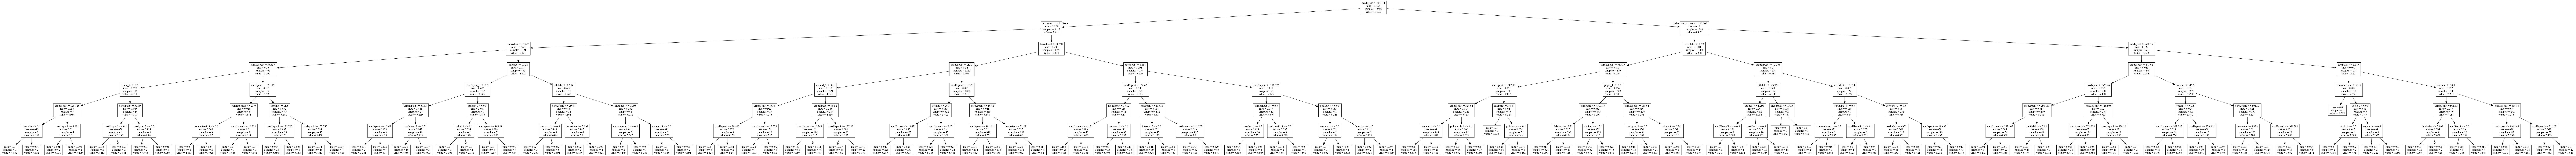

In [177]:
from IPython.display import Image
Image(filename='hr1_tree.jpg')

In [152]:
conda install pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rmadh\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_3




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   | 1          |   1% 
graphviz-2.38        | 29.3 MB   | 6          |   7% 
graphviz-2.38        | 29.3 MB   | #1         |  1

In [182]:
tree_1_best.score(train_X_new,train_y)

0.934031967405689

In [184]:
test_X_new=test_X[feature_columns]

In [185]:
tree_1_best.score(test_X_new,test_y)

0.8477598909734843

# So based on the best decision tree model, we are getting an accuracy of 85% with the the test data.